In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from malib.train import train

import matplotlib.pyplot as plt

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class SpiralDataset(Dataset):
    def __init__(self, N, K):
        self.X, self.y = self.generate_spiral_dataset(N, K)
        
        # Convert numpy arrays to PyTorch tensors
        self.X = torch.from_numpy(self.X).float()
        self.y = torch.from_numpy(self.y).long()

    def generate_spiral_dataset(self, N, K):
        X = np.zeros((N*K, 2)) # data matrix (each row = single example)
        y = np.zeros(N*K, dtype='uint8') # class labels

        for j in range(K):
            ix = range(N*j, N*(j+1))
            r = np.linspace(0.0, 1, N) # rayon
            t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
            X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
            y[ix] = j

        return X, y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

N = 100 # number of points per class
K = 3 # number of classes

spiral_dataset_train = SpiralDataset(N, K)
spiral_dataset_test = SpiralDataset(N, K)

train_loader = DataLoader(spiral_dataset_train, batch_size=3*N, shuffle=True)
test_loader = DataLoader(spiral_dataset_train, batch_size=3*N, shuffle=False)
train_loader_fixed = DataLoader(spiral_dataset_train, batch_size=3*N, shuffle=False)

In [3]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(2, 100)
        self.fc2 = nn.Linear(100, 30)
        self.fc3 = nn.Linear(30, 3)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        
        return x

In [4]:
model = MLP()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

In [5]:
train(model, train_loader, epochs=1000, optimizer=optimizer)

Epoch 250/1000. Loss=0.04661531001329422
Epoch 500/1000. Loss=0.033110033720731735
Epoch 750/1000. Loss=0.03018360771238804
Epoch 1000/1000. Loss=0.02917899750173092


In [6]:
from malib.compute_loss import compute_loss

In [7]:
compute_loss(model, train_loader_fixed, num_batches=8)

0.02917654439806938

In [8]:
from malib.create_landscape import create_1D_losscape

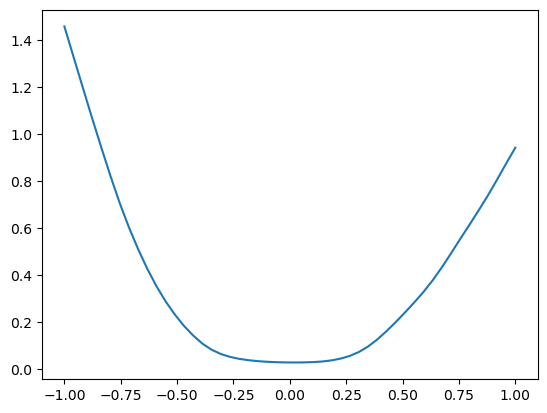

<Figure size 640x480 with 0 Axes>

In [9]:
create_1D_losscape(model, train_loader_fixed)

In [10]:
from malib.create_landscape import create_2D_losscape

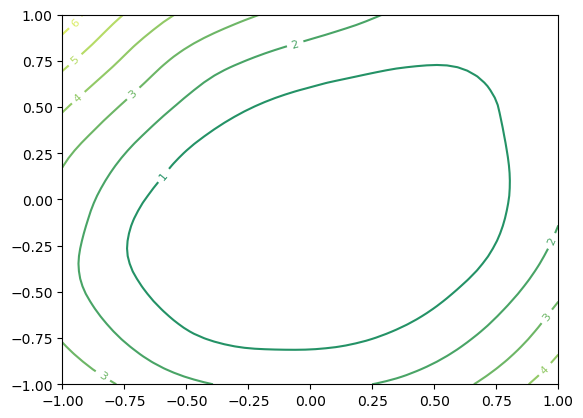

Here's your output file:losscape.vtp
number_points = 2500 points
matrix_size = 50 x 50
poly_size = 49 x 49
number_polys = 2401
Done with file:losscape.vtp


<Figure size 640x480 with 0 Axes>

In [11]:
create_2D_losscape(model, train_loader_fixed, output_vtp=True)

In [1]:
from malib.examples.spirals import create_1D_losscape, create_2D_losscape

Epoch 250/1000. Loss=0.05002720281481743
Epoch 500/1000. Loss=0.0346316434442997
Epoch 750/1000. Loss=0.03108029067516327
Epoch 1000/1000. Loss=0.029750635847449303


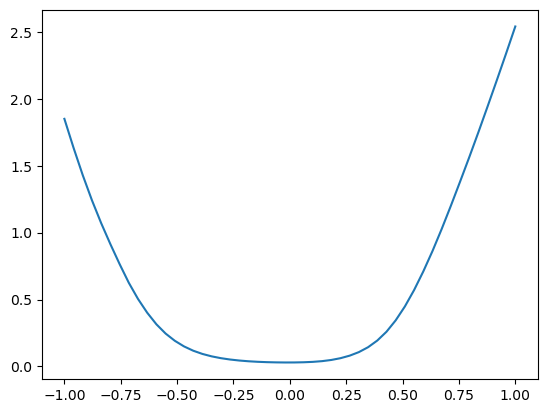

<Figure size 640x480 with 0 Axes>

In [2]:
create_1D_losscape()

Epoch 250/1000. Loss=0.05024443194270134
Epoch 500/1000. Loss=0.035664573311805725
Epoch 750/1000. Loss=0.031939972192049026
Epoch 1000/1000. Loss=0.03052438050508499


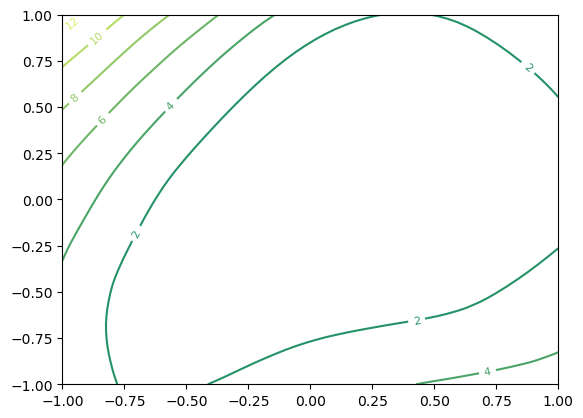

Here's your output file:losscape.vtp
number_points = 2500 points
matrix_size = 50 x 50
poly_size = 49 x 49
number_polys = 2401
Done with file:losscape.vtp


<Figure size 640x480 with 0 Axes>

In [3]:
create_2D_losscape()